In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 6]
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math
pd.set_option("display.precision", 2)
import pdal
import json
from src.resources.resources import test_pipe, ground_pipe, count_hash
import pprint
from classifications import *
from copy import deepcopy

pp = pprint.PrettyPrinter(indent=4)

In [2]:
xyz_file = '/media/sf_RECON/oakland/original/oakland_part2_ai.xyz_label_conf'

skip_lines = count_hash(xyz_file)

df = pd.read_csv(xyz_file,
                names=['x','y','z','label','conf'],
                delimiter=' ',
                skiprows=skip_lines)
df.head()

,x,y,z,label,conf
0,-429.92,-195.40,-2.01,1104,2
1,-429.96,-195.46,-1.91,1104,2
2,-429.97,-195.33,-2.05,1104,2
3,-430.01,-195.39,-1.96,1104,2
4,-430.00,-195.21,-2.04,1104,2


In [3]:
read_filter = {'type':'readers.text',
              'filename':xyz_file,
              "separator":" ",
              "header":"x y z label conf"
              }
test_pipe['pipeline'].insert(0, read_filter)
pp.pprint(test_pipe)

{   'pipeline': [   {   'filename': '/media/sf_RECON/oakland/original/oakland_part2_ai.xyz_label_conf',
                        'header': 'x y z label conf',
                        'separator': ' ',
                        'type': 'readers.text'},
                    {'type': 'filters.cluster'},
                    {   'knn': 8,
                        'threads': 2,
                        'type': 'filters.covariancefeatures'},
                    {'type': 'filters.pmf'},
                    {'type': 'filters.hag_nn'},
                    {'knn': 16, 'type': 'filters.eigenvalues'},
                    {'knn': 16, 'type': 'filters.normal'}]}


In [4]:
pipeline = pdal.Pipeline(json.dumps(test_pipe))
pipeline.execute()

100001

In [5]:
arr = pipeline.arrays[0]
df = pd.DataFrame(arr)
df.head()

,X,Y,Z,label,conf,ClusterID,Linearity,Planarity,Scattering,Verticality,Classification,HeightAboveGround,Eigenvalue0,Eigenvalue1,Eigenvalue2,NormalX,NormalY,NormalZ,Curvature
0,0.00,0.00,7.00,16.0,2008.0,1,0.97,0.03,2.35e-03,0.05,2,0.00,1.91e-01,16.78,11456.16,-3.47e-02,-0.05,1.00,1.67e-05
1,-429.92,-195.40,-2.01,1104.0,2.0,2,0.17,0.47,3.58e-01,0.42,1,10.23,1.49e-03,0.01,0.03,3.62e-02,0.21,0.98,3.21e-02
2,-429.96,-195.46,-1.91,1104.0,2.0,2,0.17,0.47,3.58e-01,0.42,1,10.32,1.59e-03,0.01,0.03,7.41e-02,0.20,0.98,3.68e-02
3,-429.97,-195.33,-2.05,1104.0,2.0,2,0.17,0.47,3.58e-01,0.42,1,10.19,1.39e-03,0.02,0.03,5.47e-03,0.19,0.98,3.09e-02
4,-430.01,-195.39,-1.96,1104.0,2.0,2,0.17,0.47,3.58e-01,0.42,1,10.28,1.59e-03,0.01,0.03,7.41e-02,0.20,0.98,3.68e-02


In [6]:
df.drop(0, inplace=True)

In [7]:
df.head()

,X,Y,Z,label,conf,ClusterID,Linearity,Planarity,Scattering,Verticality,Classification,HeightAboveGround,Eigenvalue0,Eigenvalue1,Eigenvalue2,NormalX,NormalY,NormalZ,Curvature
1,-429.92,-195.40,-2.01,1104.0,2.0,2,0.17,0.47,0.36,0.42,1,10.23,1.49e-03,0.01,0.03,3.62e-02,0.21,0.98,0.03
2,-429.96,-195.46,-1.91,1104.0,2.0,2,0.17,0.47,0.36,0.42,1,10.32,1.59e-03,0.01,0.03,7.41e-02,0.20,0.98,0.04
3,-429.97,-195.33,-2.05,1104.0,2.0,2,0.17,0.47,0.36,0.42,1,10.19,1.39e-03,0.02,0.03,5.47e-03,0.19,0.98,0.03
4,-430.01,-195.39,-1.96,1104.0,2.0,2,0.17,0.47,0.36,0.42,1,10.28,1.59e-03,0.01,0.03,7.41e-02,0.20,0.98,0.04
5,-430.00,-195.21,-2.04,1104.0,2.0,2,0.64,0.28,0.07,0.31,1,10.20,1.91e-03,0.02,0.03,-2.56e-02,0.10,0.99,0.04


In [8]:
df = df.astype({'label':'int32', 'conf':'int32'})

In [9]:
df.head()

,X,Y,Z,label,conf,ClusterID,Linearity,Planarity,Scattering,Verticality,Classification,HeightAboveGround,Eigenvalue0,Eigenvalue1,Eigenvalue2,NormalX,NormalY,NormalZ,Curvature
1,-429.92,-195.40,-2.01,1104,2,2,0.17,0.47,0.36,0.42,1,10.23,1.49e-03,0.01,0.03,3.62e-02,0.21,0.98,0.03
2,-429.96,-195.46,-1.91,1104,2,2,0.17,0.47,0.36,0.42,1,10.32,1.59e-03,0.01,0.03,7.41e-02,0.20,0.98,0.04
3,-429.97,-195.33,-2.05,1104,2,2,0.17,0.47,0.36,0.42,1,10.19,1.39e-03,0.02,0.03,5.47e-03,0.19,0.98,0.03
4,-430.01,-195.39,-1.96,1104,2,2,0.17,0.47,0.36,0.42,1,10.28,1.59e-03,0.01,0.03,7.41e-02,0.20,0.98,0.04
5,-430.00,-195.21,-2.04,1104,2,2,0.64,0.28,0.07,0.31,1,10.20,1.91e-03,0.02,0.03,-2.56e-02,0.10,0.99,0.04


In [10]:
df.describe()

,X,Y,Z,label,conf,ClusterID,Linearity,Planarity,Scattering,Verticality,Classification,HeightAboveGround,Eigenvalue0,Eigenvalue1,Eigenvalue2,NormalX,NormalY,NormalZ,Curvature
count,100000.00,100000.00,100000.00,100000.00,100000.0,100000.00,100000.00,1.00e+05,100000.00,100000.00,100000.00,100000.00,1.00e+05,1.00e+05,1.00e+05,1.00e+05,1.00e+05,1.00e+05,1.00e+05
mean,-440.08,-168.15,-11.27,1235.45,2.0,3.11,0.45,4.06e-01,0.15,0.27,1.67,1.47,4.51e-03,2.56e-02,5.65e-02,1.30e-02,8.12e-04,7.61e-01,3.55e-02
std,8.30,29.72,2.59,63.23,0.0,9.47,0.31,2.92e-01,0.16,0.24,0.47,2.58,1.62e-02,7.02e-02,2.79e-01,3.94e-01,3.81e-01,3.46e-01,5.51e-02
min,-457.62,-209.16,-15.12,1001.00,2.0,2.00,0.00,3.88e-04,0.00,0.00,1.00,-1.01,0.00e+00,5.44e-06,5.12e-04,-1.00e+00,-1.00e+00,4.78e-07,0.00e+00
25%,-447.20,-195.74,-12.97,1203.00,2.0,2.00,0.20,9.88e-02,0.03,0.06,1.00,0.00,2.05e-05,3.11e-03,8.32e-03,-7.20e-02,-4.42e-02,5.05e-01,8.25e-04
50%,-439.00,-172.73,-12.27,1203.00,2.0,2.00,0.33,3.94e-01,0.05,0.16,2.00,0.00,4.66e-05,8.94e-03,1.58e-02,4.76e-03,1.23e-02,9.96e-01,4.32e-03
75%,-433.05,-141.79,-10.33,1300.00,2.0,2.00,0.85,6.77e-01,0.25,0.51,2.00,2.49,3.11e-03,2.80e-02,5.00e-02,6.55e-02,3.92e-02,9.99e-01,5.66e-02
max,-417.95,-78.13,7.22,1501.00,2.0,151.00,0.99,1.00e+00,0.91,0.99,2.00,20.46,9.10e-01,6.37e+00,2.34e+01,1.00e+00,1.00e+00,1.00e+00,2.97e-01


In [11]:
df['class_name'] = df['label'].apply(lambda x: oakland_classes[x])
df['class_name'].value_counts()

paved_road         60304
foliage            28216
walkway             4923
vehicle             2000
grass               1643
utility_pole         676
undet                577
isolated_wire        510
large_trunk          399
crossarm             210
sign                 165
post                 148
lamp                  79
lamp_support          71
crosswalk_light       69
small_trunk           10
Name: class_name, dtype: int64

In [ ]:
df.groupby(['class_name']).mean()

In [ ]:
def plot_columns(data, columns, title=None):
    rows = math.ceil(len(columns)/4)
    cols = min(len(columns), 4)
    fig, axs = plt.subplots(rows, cols, sharey=True)
    if title is not None:
        fig.suptitle(title)
    for i in range(len(columns)):
        r = math.floor(i/cols)
        c = i%cols
        axs[r][c].hist(data[columns[i]])
        axs[r][c].set_title(columns[i])
columns = ['Linearity', 'Planarity', 'Scattering', 'Verticality', 'HeightAboveGround', 'Curvature']

def plot_oakland(class_name):
    plot_columns(df[df['class_name']==class_name], columns=columns, title=class_name)

plot_oakland('utility_pole')

In [ ]:
plot_oakland('foliage')

In [ ]:
plot_oakland('crossarm')

In [ ]:
plot_oakland('isolated_wire')

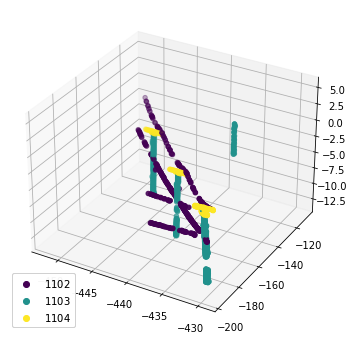

In [13]:
def plot3d(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data['X'], data['Y'], data['Z'], c=data['label'])
    legend1 = ax.legend(*scatter.legend_elements(),
                       loc="lower left")
    ax.add_artist(legend1)
    plt.show()

plot3d(df[df['class_name'].isin(['crossarm', 'utility_pole', 'isolated_wire'])])

In [ ]:
## Fine tuning the ground filter.
ground_filter = deepcopy(ground_pipe)
ground_filter['pipeline'].insert(0, read_filter)
ground_filter['pipeline'][2] = {
    "type":"filters.smrf",
    'cell': .3,
    'scalar' : 1.25,
    'slope' : .05,
    'threshold' : 0.1,
    'window' : 10.0}
"""
ground_filter['pipeline'][2] = {
    "type":"filters.skewnessbalancing"}
"""
ground_filter['pipeline'].insert(3, {
    "type":"filters.csf",
    "ignore":"Classification![2:2]",
    "resolution":"2.0",
    "step":"6.5",
    "smooth":"true",
    "threshold":"0.5",
    "rigidness":"3",
    "iterations":"200"})
ground_filter

In [ ]:
ground = pdal.Pipeline(json.dumps(ground_filter))
ground.execute()
grd_df = pd.DataFrame(ground.arrays[0])
len(grd_df)

In [ ]:
small_x = min(df['X'])
x_step = (max(df['X']) - small_x)/5
one_x_step = small_x+x_step
small_y = min(df['Y'])
y_step = (max(df['Y']) - small_y)/5
one_y_step=small_y+y_step

In [ ]:
## Split the file into smaller files with no more than 10000 points.

In [ ]:
np.zeros((1,5))

In [ ]:
points = pd.DataFrame({'X':[],
                     'Y':[],
                     'Z':[],
                     'label':[],
                     'conf':[],
                     'Classification':[]})
for i in range(3):
    x_low = small_x + i*x_step
    x_high = x_low+x_step
    for j in range(3):
        y_low = small_y+ j*y_step
        y_high = y_low+y_step
        ground_filter = deepcopy(ground_pipe)
        ground_filter['pipeline'].insert(0, read_filter)
        ground_filter['pipeline'].insert(1, {
            "type":"filters.range",
            "limits":f"X({x_low}:{x_high}],Y({y_low}:{y_high}]"
        })
        ground_filter['pipeline'][2] = {
            "type":"filters.smrf",
            'cell': .3,
            'scalar' : 1.25,
            'slope' : .05,
            'threshold' : 0.1,
            'window' : 10.0}
        """
        ground_filter['pipeline'][2] = {
            "type":"filters.skewnessbalancing"}
        """
        ground_filter['pipeline'][3] = {
            "type":"filters.csf",
            "resolution":1.0,
            "step":6.5,
            "smooth":True,
            "threshold":0.5,
            "rigidness":3,
            "iterations":500}
        print(ground_filter)
        ground = pdal.Pipeline(json.dumps(ground_filter))
        if ground.execute() > 0:
            points = pd.concat((points, pd.DataFrame(ground.arrays[0])))
        print(len(points))

In [ ]:
test = ground.arrays[0]

In [ ]:
test = pd.DataFrame(test)
test.head()